In [1]:
import os
import tarfile
import requests


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    response = requests.get(housing_url)
    with open(tgz_path, 'wb') as f:
        f.write(response.content)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)


In [4]:
import pandas as pd
import sklearn as sk
import numpy as np

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
if not os.path.exists("datasets/housing"): 
    fetch_housing_data()


In [7]:
df = load_housing_data()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

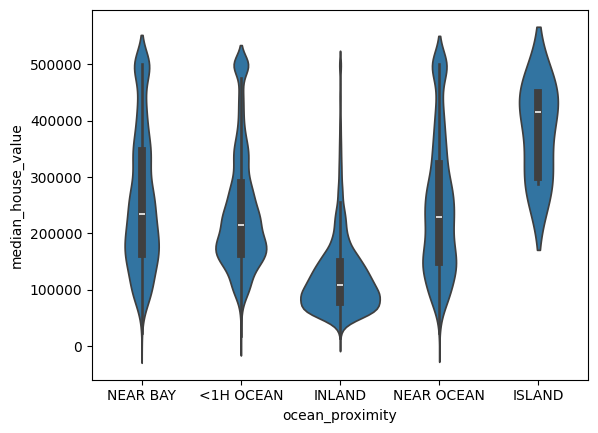

In [13]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
df.drop(['longitude', 'latitude'], axis=1).describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

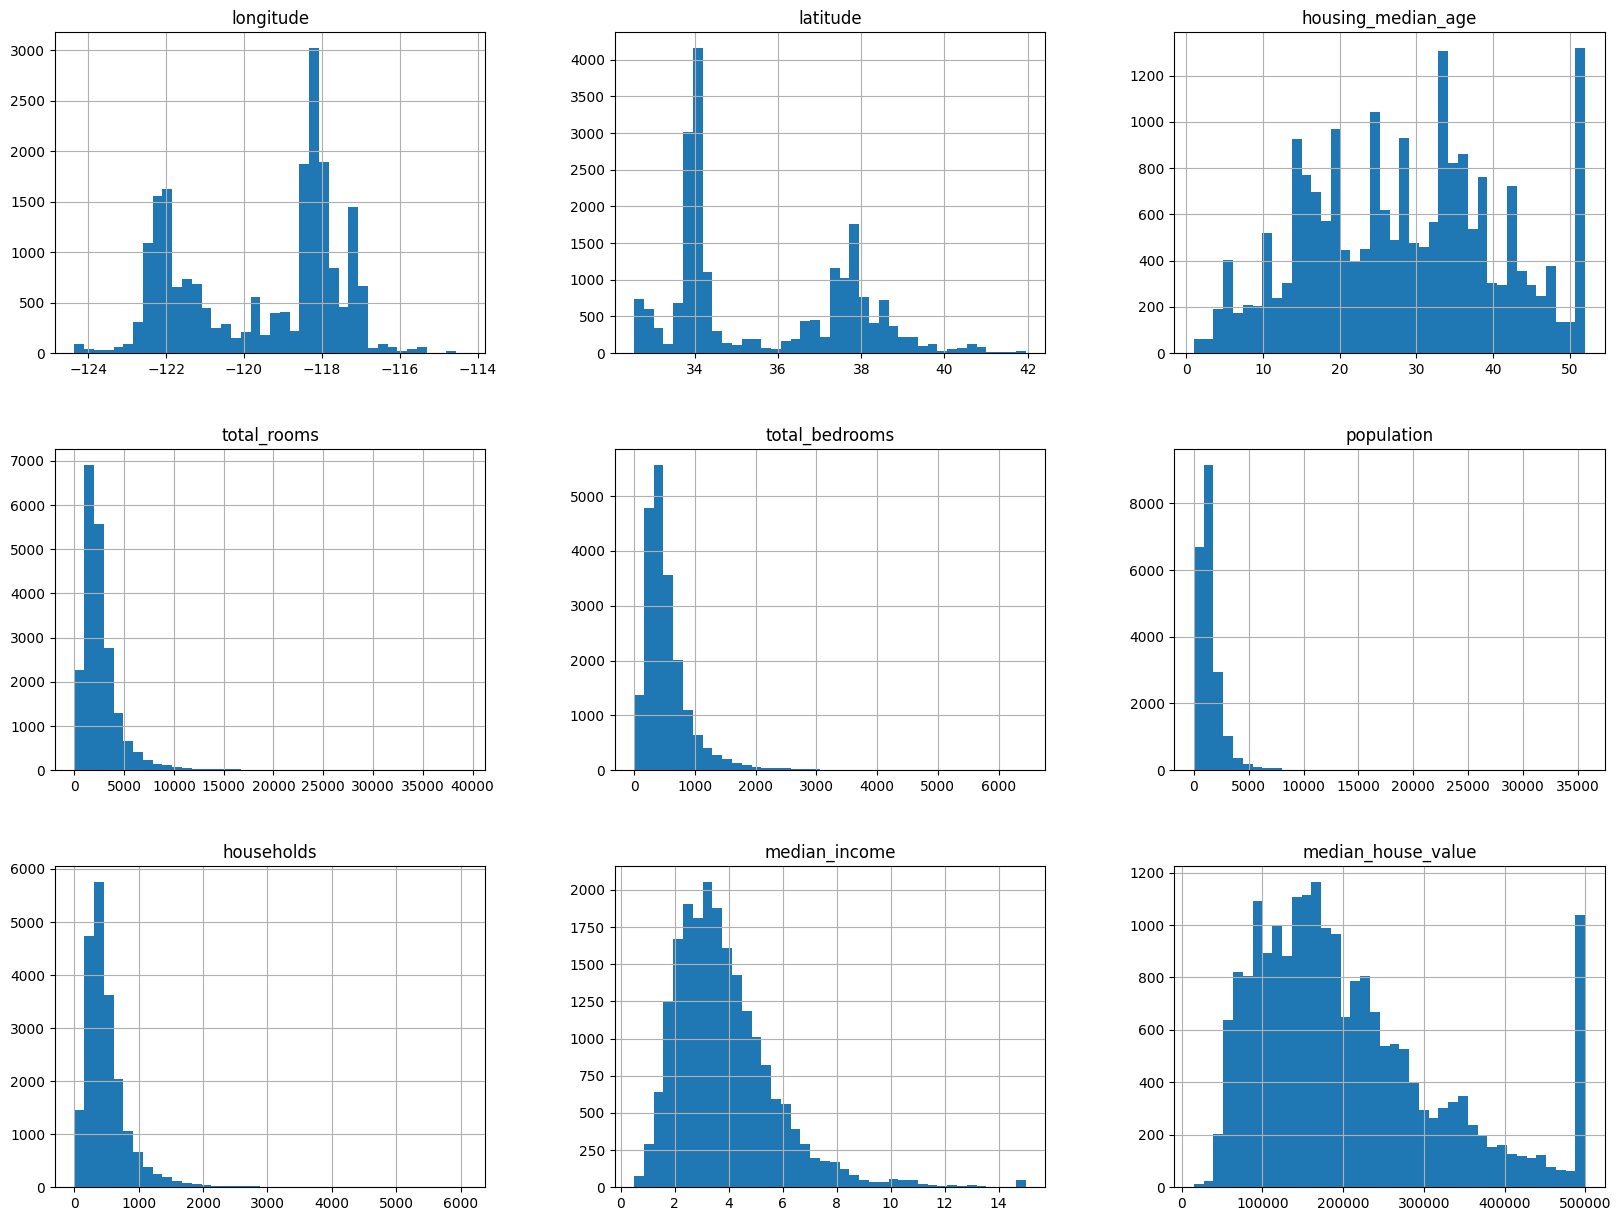

In [21]:
df.hist(bins=40, figsize=(20,15))

In [23]:
df.iloc[df['housing_median_age'].argmax()]

longitude              -122.24
latitude                 37.85
housing_median_age        52.0
total_rooms             1467.0
total_bedrooms           190.0
population               496.0
households               177.0
median_income           7.2574
median_house_value    352100.0
ocean_proximity       NEAR BAY
Name: 2, dtype: object

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

<Axes: >

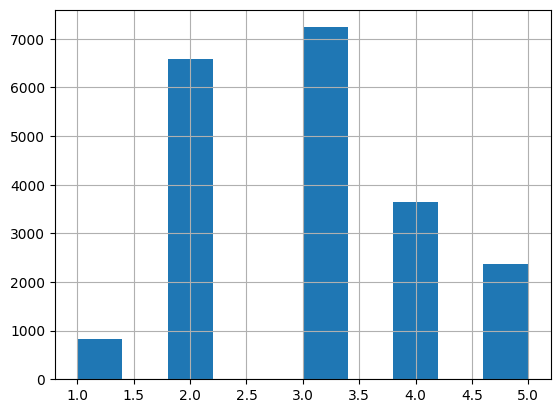

In [29]:
df['income_cat'] = pd.cut(df['median_income'], 
                          bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df['income_cat'].hist()

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [31]:
for train_idx, test_idx in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_idx]
    strat_test_set = df.loc[test_idx]

In [32]:
strat_train_set.value_counts('income_cat') / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [33]:
for sset in (strat_train_set, strat_test_set):
    sset.drop('income_cat', axis=1, inplace=True)

In [34]:
dfcopy = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

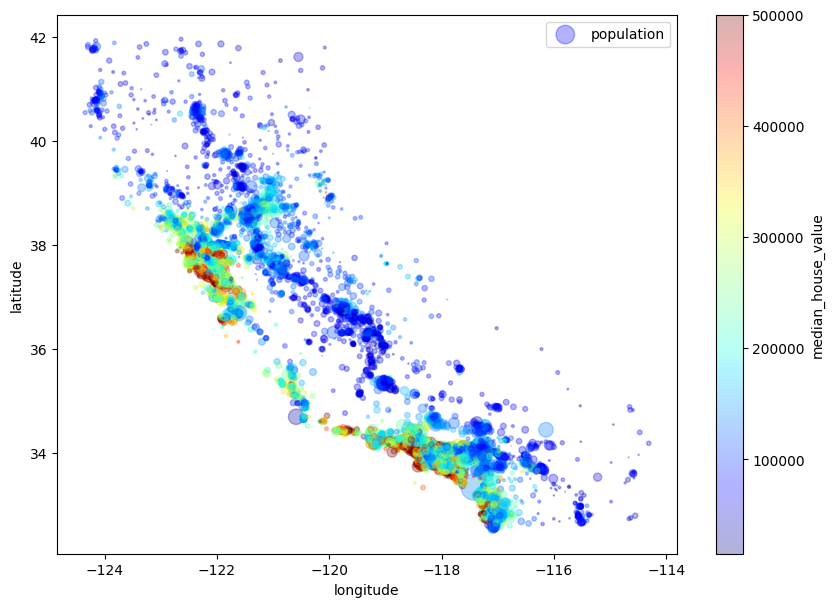

In [44]:
dfcopy.plot.scatter(x='longitude', y='latitude', alpha=0.3,
                    s=dfcopy['population']/100, label='population', figsize=(10,7),
                    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [47]:
dfcopy.drop('ocean_proximity', axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='population', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       

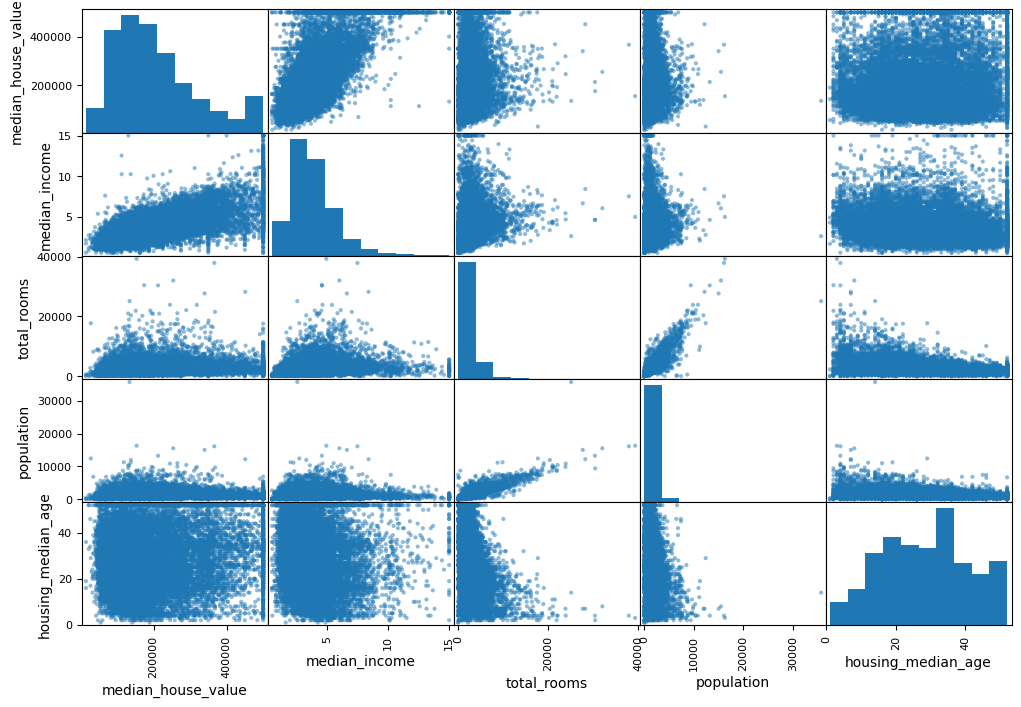

In [50]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", 'population',
    "housing_median_age"]
scatter_matrix(dfcopy[attributes], figsize=(12, 8))


In [51]:
dfcopy["rooms_per_household"] = dfcopy["total_rooms"] / dfcopy["households"]
dfcopy["bedrooms_per_room"] = dfcopy["total_bedrooms"] / dfcopy["total_rooms"]
dfcopy["population_per_household"] = dfcopy["population"] / dfcopy["households"]


In [54]:
dfcopy.select_dtypes(include=[np.number]).corr()['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [55]:
dfcopy = strat_train_set.drop("median_house_value", axis=1)
dfcopy_labels = strat_train_set["median_house_value"].copy()


In [56]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')

In [57]:
imputer

SimpleImputer(strategy='median')

In [58]:
imputer.fit(dfcopy.drop('ocean_proximity', axis=1))

SimpleImputer(strategy='median')

In [59]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [60]:
X = imputer.transform(dfcopy.drop('ocean_proximity', axis=1))

In [61]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [62]:
X_df = pd.DataFrame(X, columns=dfcopy.drop('ocean_proximity', axis=1).columns, index=dfcopy.index) # type: ignore
X_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [64]:
cat = dfcopy['ocean_proximity'].unique()
cat

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [66]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder(categories=[cat])

In [69]:
ordinal_encoder.fit(dfcopy[['ocean_proximity']])

OrdinalEncoder(categories=[array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)])

In [70]:
ordinal_encoder.categories_

[array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
       dtype=object)]

In [78]:
ocean_prox_encoded = ordinal_encoder.transform(dfcopy[['ocean_proximity']])
ocean_prox_encoded

array([[0.],
       [1.],
       [0.],
       ...,
       [2.],
       [2.],
       [0.]])

In [77]:
# dfcopy['testcat'] = pd.Series(ordinal_encoder.transform(dfcopy[['ocean_proximity']]).flatten(), index=dfcopy.index)
# dfcopy['testcat'].map(dict(zip([0,1,2,3,4], cat))).astype('category')


12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
            ...    
15174     <1H OCEAN
12661        INLAND
19263     <1H OCEAN
19140     <1H OCEAN
19773        INLAND
Name: testcat, Length: 16512, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [90]:
# pd.get_dummies(dfcopy['ocean_proximity'], dtype='int')
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder()
ocean_prox_encoded = onehot_encoder.fit_transform(dfcopy[['ocean_proximity']])
ocean_prox_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [91]:
ocean_prox_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [87]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [95]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    # ('onehot', OneHotEncoder()),
])
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [97]:
pipeline.fit(dfcopy.drop('ocean_proximity', axis=1))

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [99]:
X = pipeline.transform(dfcopy.drop('ocean_proximity', axis=1))

In [100]:
pd.DataFrame(X, columns=dfcopy.drop('ocean_proximity', axis=1).columns, index=dfcopy.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [113]:
numeric_columns = dfcopy.select_dtypes(include=['number']).columns
cat_columns = set(dfcopy.columns) - set(numeric_columns)
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [105]:
from sklearn.compose import ColumnTransformer


column_transformer = ColumnTransformer([
    ('num', pipeline, list(numeric_columns)),
    ('cat', OneHotEncoder(), list(cat_columns)),
])

In [118]:
X = column_transformer.fit_transform(dfcopy)


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [129]:
onehot_encoder = column_transformer.named_transformers_['cat']
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [142]:
transformed_cols = [c for c in numeric_columns] + [c for c in onehot_encoder.categories_[0]]
transformed_cols


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [144]:
X_tr = pd.DataFrame(X, columns=transformed_cols, index=dfcopy.index)
X_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [149]:
dfcopy.loc[X_tr['<1H OCEAN'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6980,-118.01,33.97,36.0,1451.0,224.0,608.0,246.0,6.0648,<1H OCEAN
5206,-118.28,33.93,41.0,936.0,257.0,913.0,226.0,2.0313,<1H OCEAN
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN


In [150]:
dfcopy.loc[dfcopy['ocean_proximity'] == '<1H OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6980,-118.01,33.97,36.0,1451.0,224.0,608.0,246.0,6.0648,<1H OCEAN
5206,-118.28,33.93,41.0,936.0,257.0,913.0,226.0,2.0313,<1H OCEAN
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN


In [151]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_tr, dfcopy_labels)


LinearRegression()

In [152]:
some_x = dfcopy.iloc[:5]
some_y = dfcopy_labels.iloc[:5]
some_y


12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [154]:
some_y_pred = model.predict(column_transformer.transform(some_x))
some_y_pred

c:\Users\justm\OneDrive\Desktop\ML practice\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 88983.14806384, 305351.35385026, 153334.71183453, 184302.55162102,
       246840.18988841])

In [156]:
(some_y - some_y_pred)/some_y

12655   -0.234163
15502   -0.092101
2908    -0.854108
14053   -0.638245
20496   -0.035838
Name: median_house_value, dtype: float64

In [158]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(dfcopy_labels, model.predict(X_tr))
mse

4767980139.451871

In [159]:
from math import sqrt


sqrt(mse)

69050.56219504567

In [160]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_tr, dfcopy_labels)
preds = tree_reg.predict(X_tr)
tree_mse = mean_squared_error(dfcopy_labels, preds)
tree_rmse = sqrt(tree_mse)
tree_rmse

0.0

In [162]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, X_tr, dfcopy_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.sort()

In [163]:
tree_rmse_scores

array([65471.40086875, 66575.77021568, 68960.89870535, 69223.65785847,
       70220.2395499 , 70247.00318336, 70838.61253472, 71311.7774457 ,
       71850.16140287, 73779.44075702])

In [164]:
tree_rmse_scores.mean()

69847.89625218275

In [165]:
tree_rmse_scores.std()

2322.18559901056

In [167]:
lin_scores = cross_val_score(model, X_tr, dfcopy_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.sort()
print(lin_rmse_scores.mean(), lin_rmse_scores.std())
lin_rmse_scores

69204.32275494763 2372.070791055923


array([65318.2240289 , 66767.61061621, 66930.32945876, 67706.39604745,
       69368.53738998, 69440.77896541, 70522.24414582, 70756.31946074,
       72229.03469752, 73003.75273869])

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_tr, dfcopy_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [169]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [170]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [172]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])